In [50]:
 # initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
from panel.interact import interact
from panel import widgets

pn.extension("plotly")

%matplotlib inline

In [51]:
 # Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("mapbox_key")

In [52]:
px.set_mapbox_access_token(mapbox_token)

In [53]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [54]:
 # Calculate the mean number of housing units per year (use groupby) 
avg_housing_units_by_year = sfo_data.groupby('year')['housing_units'].mean()
    

In [55]:
avg_housing_units_by_year.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

In [56]:
avg_housing_units_by_year.tail()

year
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [57]:
avg_housing_units_by_year.describe()

count         7.000000
mean     378401.000000
std        4206.000713
min      372560.000000
25%      375480.500000
50%      378401.000000
75%      381321.500000
max      384242.000000
Name: housing_units, dtype: float64

In [58]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

min=avg_housing_units_by_year.min()
max=avg_housing_units_by_year.max()

avg_housing_units_by_year.hvplot.bar(xlabel = 'Year', ylabel='AVG Units', ylim = (min,max))

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!


#plt.show()
#plt.close(fig_housing_units)

:Bars   [year]   (housing_units)

In [59]:
#In this section, you want to visualize the average gross rent per year to better understand the trends for rental income over time. 
#You will visualize the average (mean) gross rent per year and visualize it as a line chart.

#Calculate the mean gross for each year.
#Visualize the mean gross rent per year as a line chart.

In [60]:
# Calculate the average gross rent and average sale price per square foot
avg_gross_rent = sfo_data.groupby('year')['sale_price_sqr_foot','gross_rent'].mean()
avg_gross_rent

C:\Users\maxla\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


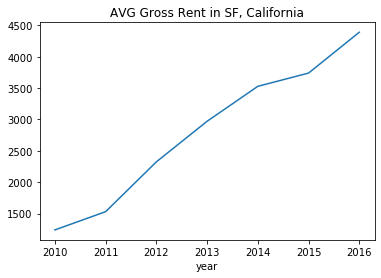

In [61]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_gross_rent = sfo_data.groupby('year')['gross_rent'].mean().plot(y='Avg Gross Rent', title = "AVG Gross Rent in SF, California")

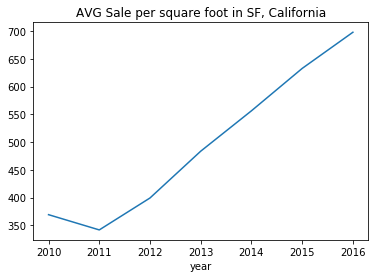

In [62]:
avg_sale_price = sfo_data.groupby('year')['sale_price_sqr_foot'].mean().plot(y='Avg sale per sqr foot', title = "AVG Sale per square foot in SF, California")

In [63]:
#Average Prices by Neighborhood
#use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

In [64]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhoods_mean_values = sfo_data.reset_index()


In [65]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhoods_mean_values.groupby(['year','neighborhood']).mean()
neighborhoods_mean_values.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [66]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

def neighborhood_function(neighborhood):
    return neighborhoods_mean_values.loc[neighborhoods_mean_values['neighborhood']==neighborhood,:].hvplot(x='year',y='sale_price_sqr_foot')

choose_neighborhood = neighborhoods_mean_values['neighborhood']

interact(neighborhood_function, neighborhood = choose_neighborhood)
            

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02236')

In [67]:
#In this section, you will need to calculate the 
#mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. 
#Plot the results as a bar chart.

In [68]:
# Getting the data from the top 10 expensive neighborhoods



In [69]:
top_ten_expensive = neighborhoods_mean_values.groupby(['neighborhood']).mean().sort_values('sale_price_sqr_foot', ascending = False)
top_ten_expensive.head(10)

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Union Square District,2012.500000,903.993258,377427.50,2555.166667
Merced Heights,2014.000000,788.844818,380348.00,3414.000000
Miraloma Park,2011.750000,779.810842,375967.25,2155.250000
Pacific Heights,2013.000000,689.555817,378401.00,2817.285714
Westwood Park,2015.000000,687.087575,382295.00,3959.000000
Telegraph Hill,2013.000000,676.506578,378401.00,2817.285714
Presidio Heights,2013.000000,675.350212,378401.00,2817.285714
Cow Hollow,2013.000000,665.964042,378401.00,2817.285714
Potrero Hill,2013.000000,662.013613,378401.00,2817.285714


In [70]:
#dropping year column
top_ten_expensive = top_ten_expensive.drop(columns=['year'])
top_ten_expensive = top_ten_expensive.reset_index()
top_ten_expensive.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [71]:
top_ten_expensive.head(10).hvplot.bar(x='neighborhood',y='sale_price_sqr_foot', rot =45, title = 'Top 10 Most Expensive Neighborhoods in SFO')

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [72]:
 #Parallel Coordinates and Parallel Categories Analysis
#In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations 
#so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 
#Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
#Create a Parallel Coordinates PlotCreate a Parallel Categories Plot

In [73]:
# Parallel Coordinates Plot - Viewing top 10 most expensive neighborhoods


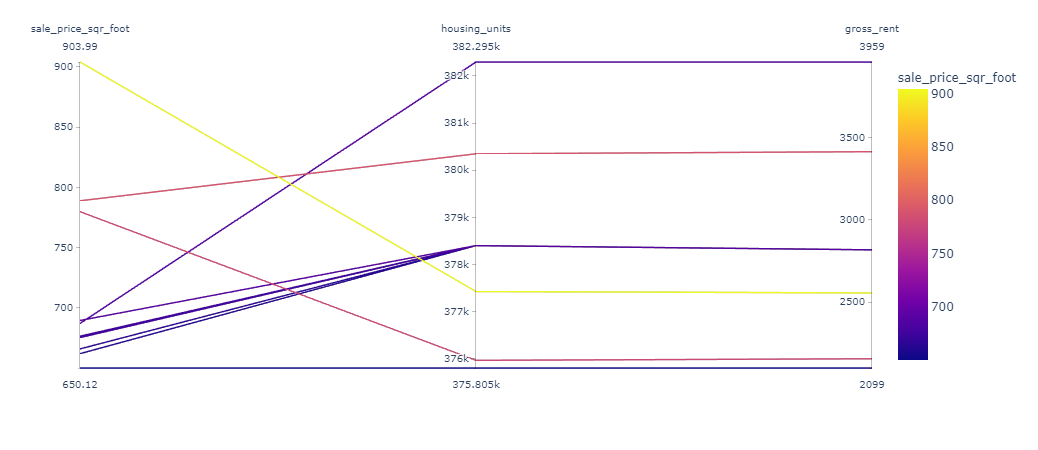

In [74]:
px.parallel_coordinates(top_ten_expensive.head(10), color='sale_price_sqr_foot')

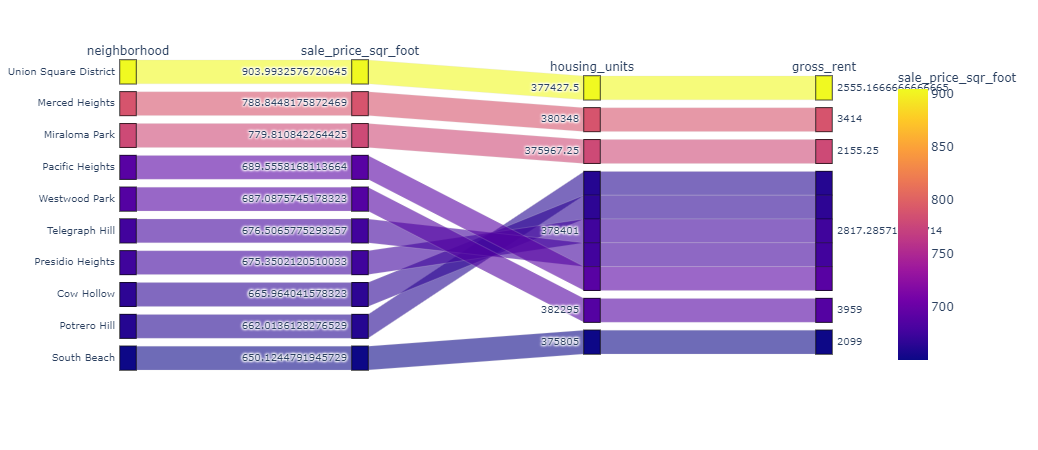

In [75]:
# Parallel Categories Plot
px.parallel_categories(
    top_ten_expensive.head(10),
    dimensions=['neighborhood','sale_price_sqr_foot','housing_units','gross_rent'],
    color = 'sale_price_sqr_foot')

In [76]:
#In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. 
#Use a scatter_mapbox from plotly express to create the visualization. 
#Remember, you will need your mapbox api key for this.

In [77]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [78]:
# Calculate the mean values for each neighborhood
avg_neighborhood_values = neighborhoods_mean_values.groupby('neighborhood')['sale_price_sqr_foot','housing_units','gross_rent'].mean()



C:\Users\maxla\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [79]:
avg_neighborhood_values = avg_neighborhood_values.reset_index()

In [80]:
avg_neighborhood_values.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [81]:
# Join the average values with the neighborhood locations
avg_values_by_location = pd.concat([df_neighborhood_locations, avg_neighborhood_values],axis='columns')

In [82]:
avg_values_by_location.head()

,Neighborhood,Lat,Lon,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,Bernal Heights,576.746488,379374.5,3080.333333


In [83]:
#Dropping neighborhood column

avg_values_by_location = avg_values_by_location.drop(columns=['neighborhood'])
avg_values_by_location.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


In [84]:
# Create a scatter mapbox to analyze neighborhood info
map_plot= px.scatter_mapbox(
    avg_values_by_location,
    lat="Lat",
    lon='Lon',
    size = 'gross_rent',
    color = 'Neighborhood',
    color_continuous_scale=px.colors.cyclical.IceFire,
    title = "Prices By Neighborhood",
    zoom=10,

)

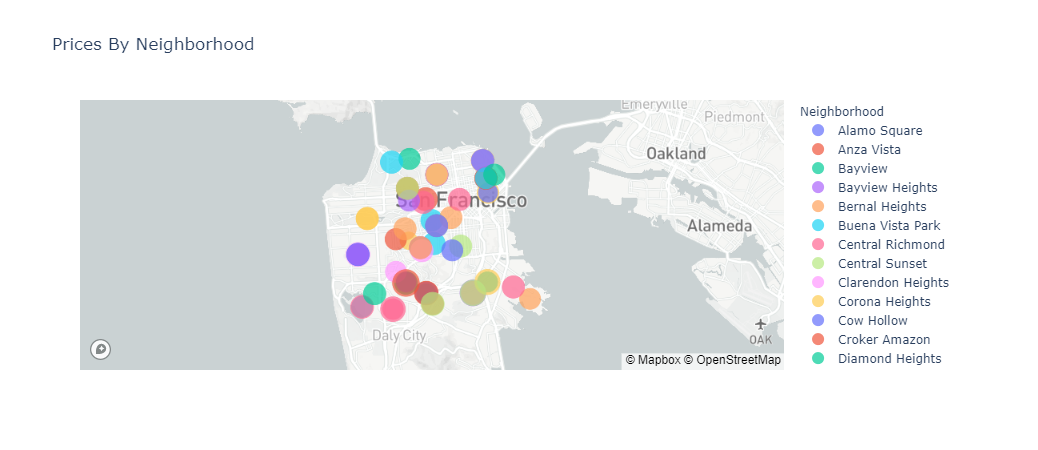

In [85]:
map_plot.show()

In [86]:
map_plot2= px.scatter_mapbox(
    avg_values_by_location,
    lat="Lat",
    lon='Lon',
    size = 'gross_rent',
    color = 'sale_price_sqr_foot',
    color_continuous_scale=px.colors.cyclical.IceFire,
    title = "Avg Sale Price Per Square Foot & Gross Rent in SFO",
    zoom=10,

)


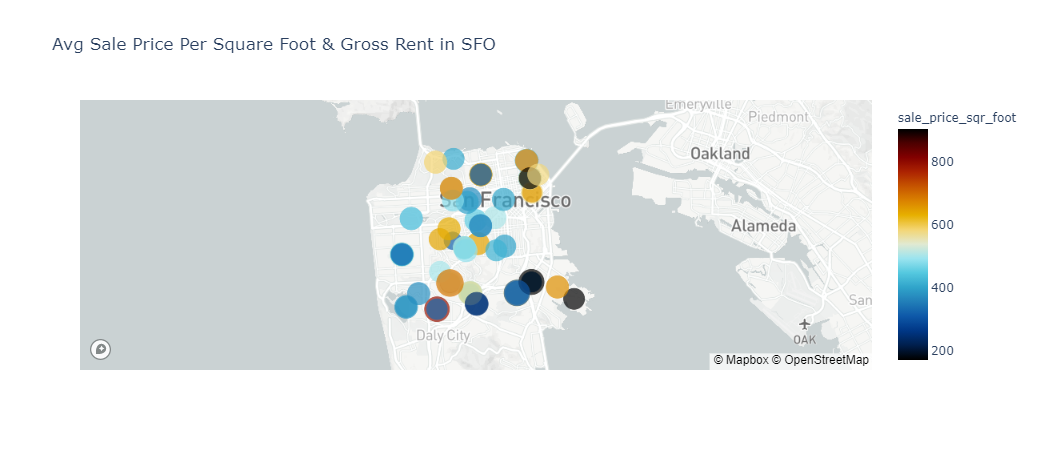

In [87]:
map_plot2.show()